# Decision trees 
In this notebook, you will implement decision tree algorithm on different datasets. This notebook contains the following parts:

1) Loading a dataset

2) Implementing a decision tree using the Scikit-learn library

3) Advanced section: Implementing a decision tree from scratch

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import plot_tree


## 1) Loading and inspecting a dataset

Scikit-learn comes with a few standard toy datasets. You can use them without downloading any file from external website. See https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets

Here, we will use iris dataset, https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

The code below loads the iris dataset and creates a new pandas dataframe (named `df` that we will use in this example).


This data has the following features:
- sepal_length: Sepal length, in centimeters
- sepal_width: Sepal width, in centimeters
- petal_length: Petal length, in centimeters
- petal_width: Petal width, in centimeters

And the target is the type of the flower: *'Setosa'*, *'Versicolor'*, or *'Virginica'*. These are coded as {0, 1, 2} in the `target` column and there are 50 instances of each.



In [18]:
raw_data = load_iris()
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df['target'] = raw_data.target

In [19]:
df.info() # details on the size and variables in this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [20]:
df.head() # print the first few rows of this data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we will select some data to use for training and the rest will be for testing. In this example we are not creating a separate validation/development set, but for a real project that that would be important. 

We want to create two sets: a training set (70% of the data) and a test set (30%):

In [21]:
# see above: from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[raw_data.feature_names], 
                                                    df['target'], 
                                                    test_size=0.3, 
                                                    random_state=0)

We can check that the resulting dimensionality of these subsets are correct:

In [22]:
# The number of rows in the training features and training labels are equal
print("Train: ", X_train.shape[0], y_train.shape[0])

# The number of rows in the testing features and testing labels are equal
print("Test:  ", X_test.shape[0], y_test.shape[0])

# The number of rows in the training plus testing is equal to the rows in the full dataset
print("All rows accounted for:", X_train.shape[0] + X_test.shape[0], df.shape[0])


Train:  105 105
Test:   45 45
All rows accounted for: 150 150


In [23]:
# The number of feature columns in the training and test set matches, 
# and contains one fewer column than the full dataset:
print(X_train.shape[1], X_test.shape[1], df.shape[1])

4 4 5


In [24]:
# The training and testing labels don't have columns, they are only one dimension:
print(y_train.ndim, y_test.ndim)

1 1


#### Thought question: 

To apply a decision tree to this data, do we need to standardize these features? Why or why not? What would need to change to change your answer to this question?

## 2) Implementing a decision tree using the Scikit-learn library


When training decision trees, we want to add nodes to efficiently split the data. The eventual goal is to learn a model that makes proper classifications for new instances. In other words, one which exhibits good generalization.

### Decision tree structure

Decision trees are usually full binary trees which means that every node has either 0 or 2 children. If it has 0 then it is a leaf node. The figure below is annotated with some of the terminology used when talking about trees.

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" alt="Tree structure" width="50%">




### Exercise 1 _ 

#### Part 1 _ Initialize a Decision Tree 

In order to build a scikit-learn model, it first must be initalized. For those following the Data Processing Advanced course, this is object-oriented programming. The initialization is creating an object (in this case a `DecisionTreeClassifier`) that has attached functions that we will use to train the model based on data and then make predictions. Initialization does not do these steps, it just creates the `DecisionTreeClassifier` object.

Documentation on the `DecisionTreeClassifier` object: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [25]:
# see above: from sklearn.tree import DecisionTreeClassifier   


dtc = DecisionTreeClassifier() 

#### Part 2 _ Train the decision tree

Now that you have a `DecisionTreeClassifier` object, we can use function(s) to train this model object with the training data we created earlier: `X_train` and `y_train`. Use the `DecisionTreeClassifier` documentation to determine which function(s) to use to find the best fitting `DecisionTreeClassifier` model for the training dataset.

**Note**: The scikit-learn package is designed such that this process will not create a new variable in python (or in scikit-learn). Instead, it will update the existing `DecisionTreeClassifier` object you created.

In [26]:
# Train the model on the data (train set)

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

#### Part 3 _ Predict with the decision tree

Now that you have trained the `DecisionTreeClassifier` object, we can now use function(s) to generate predictions by the model on the test data we created earlier: `X_test` and `y_test`. Use the `DecisionTreeClassifier` documentation to determine which function(s) to use to do this.

**Note**: The scikit-learn package is designed such that this process *will* create and return a new variable in python. The model object generates a list of predictions that then must be saved to a variable.

In [27]:
# Predict the labels of new data (test set)

test_prediction = dtc.predict(X_test)

#### Part 4 _ Evaluate the decision tree predictions

Use a scikit-learn function (see the Week 1 practical exercises if needed) to compute the accuracy of this model on the test set.

In [28]:
test_accuracy = accuracy_score(y_test, test_prediction)

print('Accuracy on test set: ', round(test_accuracy, 3))

Accuracy on test set:  0.978



#### Thought question 1: 

Do you expect accuracy on the training data set to be higher or lower than the accuracy on the test data set? Why or why not?

Highee

#### Part 5 _ Check accuracy on the training data

A trained scikit-learn model object can make predictions on more than one dataset. Use the trained model above to make predictions on the training set data.


In [29]:
training_prediction = dtc.predict(X_train)
accuracy_scoretrain = accuracy_score(y_train, training_prediction)
accuracy_scoretrain

1.0

#### Thought question 2: 

If this model was going to be used by a local florist to autmatically generate plant labels (and correctly price them), do you think the accuracy on the training data or test data is a better reflection of the true accuracy of this model? Why?

Testing, because it has already seen the training data

The library `sklearn.tree` contains implementations of various types of decision trees and forests.

### Exercise 3 _ Finding the Optimal `max_depth`

Tree depth is a measure of how many splits it makes before coming to a prediction. `max_depth` is a hyperparameter for the decision tree model that specifies the maximum depth a tree can reach.   

It is important to remember that trees do not need to reach their `max_depth`, the learning process can stop earlier.

Evaluating hyperparameter values during the search for optimal hyperparameter values for a model should not be done with the true test set, because this can lead to over estimating your performance on the test set. Instead, each hyperparameter value should be evaluated on the validation or developmental set. Only best hyperparameter value(s) for a model should then be evaluated on the test set.

So, to find the optimal `max_depth` we must first create three datasets: train, development, and test.

In [30]:
# see above: from sklearn.model_selection import train_test_split
#   unfortunately, won't naturally produce a development/validation set
#   so we need to make two calls to the function:

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_dev_and_test, y_train, y_dev_and_test = train_test_split(df[raw_data.feature_names], 
                                                                    df['target'],
                                                                    test_size=1 - train_ratio,
                                                                    random_state=0)

X_dev, X_test, y_dev, y_test = train_test_split(X_dev_and_test, 
                                                y_dev_and_test, 
                                                test_size=test_ratio/(test_ratio + validation_ratio),
                                                random_state=0) 

print(X_train.shape, X_dev.shape, X_test.shape, df.shape)

(112, 4) (22, 4) (16, 4) (150, 5)


#### Part 1 _ Evaulate `max_depth` values

Write code that trains a decision tree on the training dataset and evaluates the accuracy on the developmental dataset for each value of `max_depth` from 1 to 7.

Store the accuracy for each max_depth as a list.

Store a variable that contains the best model found so far.

In [31]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 7))

# List to store the accuracy for each value of max_depth:
dev_accuracy = []

# Remember the best model so far
best_model = None

for depth in max_depth_range:
    dtcmd = DecisionTreeClassifier(max_depth = depth)
    dtcmd.fit(X_train, y_train)
    y_dev_pred = dtcmd.predict(X_dev)
    accuracy = accuracy_score(y_dev, y_dev_pred)
    
    dev_accuracy.append(accuracy)
    if best_model is None:
        best_model = dtcmd
    elif accuracy > max(dev_accuracy):
        best_model = dtcmd

    
print(dev_accuracy)

[0.5, 0.9545454545454546, 1.0, 1.0, 1.0, 1.0]


#### Part 2 _ Evaluate best `max_depth`

Evaluate the performance on the test set of the model with the best performance on the developmental set.

In [32]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtcmd.fit(X_dev, y_dev)
y_test_pred = dtcmd.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
acc

0.9375

#### Thought question:

Why might the performance on the test set be lower than on the development set? Which is the better measure of performance for this model?

### Exercise 4 _ hyperparameter tuning `criterion`

#### Part 1 

The default measure of impurity for the `DecisionTreeClassifier` model in scikit-learn is the Gini impurity measure (details here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Train and evaluate performance on the test set two decision trees: one trained with the Gini impurity measure and another with the entropy impurity measure (unfortunately the misclassification impurity measure is not supported). Use a fresh 80% train and 20% test split of the data and a `max_depth` of 2 for this exercise.


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[raw_data.feature_names],
                                                    df["target"],
                                                    train_size = 0.8,
                                                    random_state = 0)

dtcgi = DecisionTreeClassifier(max_depth = 2, criterion =  "gini")
dtcgi.fit(X_train, y_train)
y_pred_gi = dtcgi.predict(X_test)
test_score_gini = accuracy_score(y_test, y_pred_gi)

dtcen = DecisionTreeClassifier(max_depth = 2, criterion = "gini") 
dtcen.fit(X_train, y_train)
y_pred_en = dtcen.predict(X_test)
test_score_entropy = accuracy_score(y_test, y_pred_en)

In [34]:
print('Gini impurity model accuracy: ', round(test_score_gini, 2))
print('Entropy impurity model accuracy: ', round(test_score_entropy, 2))

Gini impurity model accuracy:  0.97
Entropy impurity model accuracy:  0.97


#### Part 2

Visualize both decision trees. Are they different? 

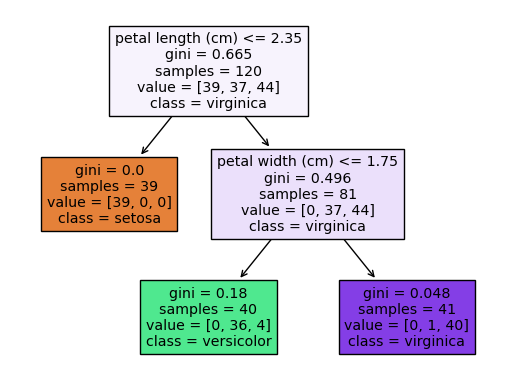

In [35]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

plot_tree(dtcen,
          feature_names = fn, 
          class_names=cn,
          filled = True);

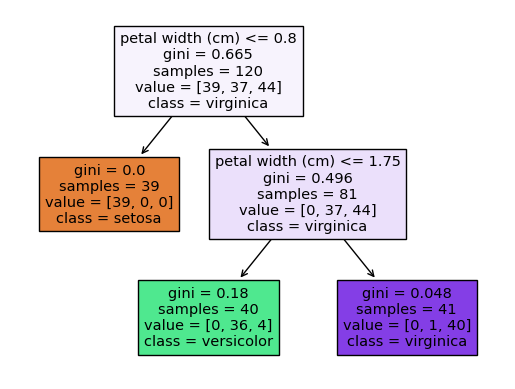

In [36]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

plot_tree(dtcgi,
          feature_names = fn, 
          class_names=cn,
          filled = True);

# 3) Advanced Section: Implementing a decision tree from scratch

Recursive functions are very useful when dealing with tree structures, which are recursive structures themselves. We do not know how deep the tree is. All we can see is if the node we are currently looking at has any children, and if it does we can try to visit those, and repeat this.

## Recursion

A recursive function is a function that calls itself until some base case is reached. The base case is a condition we check with every call to the function to make sure it still makes sense to call itself. Without the base case the recursion would continue infinitely.

Recursion is often explained by referring to Russian nesting dolls. Each time you open a doll, another doll is inside. This continues until you reach the smallest doll (the base case). Without knowing how many dolls there are we know how to solve the task of opening all the dolls, as we simply keep calling the open *'function'* until we reach the last doll.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Russian-Matroshka_no_bg.jpg" width="30%">

An example of a problem we can solve using a recursive function is calculating the factorial. The base case is that if ```n == 0``` we no longer need to calculate the factorial, as here we know the answer, and otherwise we calculate the answer by calculating the factorial for ```n-1```, until we reach 0. In the cell below the ```factorial``` function is given, with print statements to show what's happening.

In [37]:
def factorial(n):
    if n == 0:
        print("This I know! (the base case)")
        return 1
    else:
        print("I don't know the factorial for", n, "let's try", n-1)
        return n * factorial(n-1)
    
factorial(5)

I don't know the factorial for 5 let's try 4
I don't know the factorial for 4 let's try 3
I don't know the factorial for 3 let's try 2
I don't know the factorial for 2 let's try 1
I don't know the factorial for 1 let's try 0
This I know! (the base case)


120

The 'thought process' of the recursive function goes something like this:

    call factorial( 5 )
        call factorial( 4 )
            call factorial( 3 )
                call factorial( 2 )
                    call factorial( 1 )
                        return 1
                    return 2 * 1
                return 3 * 2
            return 4 * 6
        return 5 * 24
    print (120) 

### Exercise 5 _ Sum of a list using recursion

Write a recursive function in the cell below which takes a list of numbers and returns the sum of that list. 

**Hint:** Remember that you can use the a colon to select a part of a list. For example ```a[2:]``` returns all but the first two elements from the list ```a```.

In [38]:
def rec_sum(a):
    if len(a) == 1:
        return a[0]
    else:
        return a[-1] + rec_sum(a[:-1])

In [39]:
a = rec_sum([1,2,3,4,5,6])
print(a)

21


Clearly the function in exercise 5 is not the most useful recursive function, and it can be easily solved with a loop. But it might help you get started thinking about how it works. Let's see how it can be more useful.

## Tree structures

As mentioned before, recursive functions are very useful when dealing with tree structures. Here we will use them to implement the decision tree. 

The cell below defines functions we can use to construct nodes (represented as dictionaries) in  a decision tree. The nodes store references to its children (left and right) and to the question (feature value) to ask about at this node, as well as the class we'll predict at this node.

In [2]:
def Node(left=None, right=None, feature=None, value=None, predict=None):
    "Return a node in a binary decision tree"
    return dict(left=left, right=right, feature=feature, value=value, predict=predict)

def isLeaf(node):
        """Helper function to check if the current node is a leaf"""
        return node['left'] is None and node['right'] is None

In [41]:
def pretty(node, depth=1):
        """Print the node in a human-readable manner """
        if isLeaf(node):
            return "Predict: \"{:s}\"".format(node['predict'])
        else:
            s = "if features[{:d}] != \"{:s}\" then:\n {:s} \n{:s}else:\n {:s}"
            return s.format(node['feature'], 
                            node['value'], 
                            "\t" * depth + pretty(node['left'], depth+1),
                            "\t" * (depth-1),
                            "\t" * depth + pretty(node['right'], depth+1))

Let's illustrate the use of this class with an example of a made-up tree below.

In [42]:
# We want to first ask about value Round in column at index 2.
root = Node(feature=2, value="Round",         
            
            # If false, in the left branch, which is a leaf node, 
            # we'll predict Banana  
            left=Node(predict="Banana"),
            
            # If true, in the right branch we'll ask about the color Red
            right=Node(feature=1, value="Red", 
                       
                       # Based on the answer to question about color Red, 
                       # we'll predict either Lime
                       left=Node(predict="Lime"),
                       
                       # or Apple
                       right=Node(predict="Apple")))

# Thanks to the `pretty` function we can print the tree 
# and get the rules formatted in a humanly readable format.
print(pretty(root))

if features[2] != "Round" then:
 	Predict: "Banana" 
else:
 	if features[1] != "Red" then:
 		Predict: "Lime" 
	else:
 		Predict: "Apple"


In [43]:
# Additionally we can use `isleaf` to check if a node is a leaf node or not.
print("Is root a leaf node?", isLeaf(root))

print("Is the right child of root a leaf node?", isLeaf(root['right']))
print()

# If we want to find out which column the root looks at we can:
print("The root looks at column", root['feature'], 
      "and checks if its value is equal or not to", root['value'])

Is root a leaf node? False
Is the right child of root a leaf node? False

The root looks at column 2 and checks if its value is equal or not to Round


### Dataset

In the example above we made up the decisions, but normally you would want to generate these based on the data. For this we'll use the weather dataset in the next cell, the objective of this dataset is to figure out if the weather conditions are such that it is nice enough to go and play outside. 

It has the following features, all of which are categorical.
- outlook {sunny, overcast, rainy}
- temperature {hot, mild, cool}
- humidity {high, normal}
- windy {TRUE, FALSE}

And the target is:
- Can we play outside today? {yes, no}

The features are stored in X_train, each row in X_train is a different day/moment. y_train contains the label for each row.

In [9]:
X_train = [['sunny', 'hot', 'high', 'FALSE'],
 ['sunny', 'hot', 'high', 'TRUE'],
 ['overcast', 'hot', 'high', 'FALSE'],
 ['rainy', 'mild', 'high', 'FALSE'],
 ['rainy', 'cool', 'normal', 'FALSE'],
 ['rainy', 'cool', 'normal', 'TRUE'],
 ['overcast', 'cool', 'normal', 'TRUE'],
 ['sunny', 'mild', 'high', 'FALSE'],
 ['sunny', 'cool', 'normal', 'FALSE'],
 ['rainy', 'mild', 'normal', 'FALSE'],
 ['sunny', 'mild', 'normal', 'TRUE'],
 ['overcast', 'mild', 'high', 'TRUE'],
 ['overcast', 'hot', 'normal', 'FALSE'],
 ['rainy', 'mild', 'high', 'TRUE']]

y_train = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
print(X_train[:2])

[['sunny', 'hot', 'high', 'FALSE'], ['sunny', 'hot', 'high', 'TRUE']]


### Helper Functions

Now let's define some functions that will be helpful to learn a decision tree and use it to make predictions

First, let's define the function ```majority``` which takes a list of categorical values and returns the one which occurs most often.

This would be helpful when creating a leaf node and you want to know what label to assign to `predict`.

In [10]:
def majority(a):
    
    tdict = {}

    # build a dictionary where each key is the categorical label 
    # and the value is the number of times that label occurs
    for item in set( a ): 
        tdict[item] = a.count( item )

    # assending sort of the tdict entries based on
    # the values (this is what is specified by the key parameter)
    items = sorted( tdict.items(), key = lambda x: x[1] ) 

    # return the key ([0]) of the last entry in items ([-1])
    # this will be the entry with the highest label count
    return items[-1][0]

In [12]:
# check the function works
assert majority(y_train) == 'yes' and majority(y_train[:3]) == 'no', "majority function contains a mistake"


Now that we have a dataset we can figure out which questions to ask. To do this we first need to generate the set of potential questions. 

Because we are dealing with features which are categorical all our questions are going to be whether the feature's value is equal to a particular (of the form ```if temperature == 'hot'```). 

Here is a function ```question_set``` which takes ```X_train``` as input and returns the unique values in each column. One way to do this is to generate a list where the nth row contains the set of unique values in the nth column.

In [19]:
def question_set(X):
    #................................

    # build a list with one list for each feature
    qset = []
    for col in X[0]:
        qset.append( [] )
    
    # for each item in X
    for row in X:
        # for each element in the row
        for i,col in enumerate(row):
            # add that item to the appropriate list in qset
            qset[i].append(col)

    # for each element in qset, convert the list to a set containing one instance
    # of each label using list comprehensions
    return [set(row) for row in qset]

In [21]:
question_set(X_train)

[{'overcast', 'rainy', 'sunny'},
 {'cool', 'hot', 'mild'},
 {'high', 'normal'},
 {'FALSE', 'TRUE'}]


The function ```split``` in the cell below that takes the node defined below, ```X_train```, and ```y_train```, and returns four lists. The first containing the rows from X_train which have outlook == overcast, the second containing the labels for those rows. The third and fourth lists should contain the same but then for the rows which have a different outlook.

Or in others words if we have a question (does `feature` equal `value`) this function determins how to split the dataset according to the answer.

In [49]:
def split(feature, value, X, y):
    #................................
    X_left = []
    y_left = []
    X_right = []
    y_right = []
    for row,label in zip(X,y):
        if row[feature] == value:
            X_left.append(row)
            y_left.append(label)
        else:
            X_right.append(row)
            y_right.append(label)
    return X_left, y_left, X_right, y_right

In [50]:
split(0, 'overcast', X_train, y_train)

([['overcast', 'hot', 'high', 'FALSE'],
  ['overcast', 'cool', 'normal', 'TRUE'],
  ['overcast', 'mild', 'high', 'TRUE'],
  ['overcast', 'hot', 'normal', 'FALSE']],
 ['yes', 'yes', 'yes', 'yes'],
 [['sunny', 'hot', 'high', 'FALSE'],
  ['sunny', 'hot', 'high', 'TRUE'],
  ['rainy', 'mild', 'high', 'FALSE'],
  ['rainy', 'cool', 'normal', 'FALSE'],
  ['rainy', 'cool', 'normal', 'TRUE'],
  ['sunny', 'mild', 'high', 'FALSE'],
  ['sunny', 'cool', 'normal', 'FALSE'],
  ['rainy', 'mild', 'normal', 'FALSE'],
  ['sunny', 'mild', 'normal', 'TRUE'],
  ['rainy', 'mild', 'high', 'TRUE']],
 ['no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no'])

Once we know how to split the dataset based on questions, we need decide which questions to ask first. In the lecture we discussed how the best decision reduces the uncertainty the most. So let's write some functions to help us measure the uncertainty.

## Entropy

Entropy is a measure of uncertainty, Entropy is calculated as follows:

$H(P) = - \sum\limits_{i=1}^N P_i \log_2(P_i)$

where in the case of a list of labels $P$ is a list and $P_i$ is the proportion of all `labels` that are equal to the $i^{th}$ label.


### Exercise _ Entropy

Write the ```entropy``` function in the cell below. 

In [23]:
from math import log2

def entropy(labels):
    
    entropy_score = 0 
    
    for unique_label in set( labels ): 
        p_i = labels.count(unique_label) / len(labels)
        
        entropy_score -= p_i * log2(p_i)
        # your code here

    return entropy_score

Here are tests to verify that the entropy of the list ```[0,1]``` is `1.0`, of the list ```[-1,1,2,3]``` is 2.0, and that the entropy of the first 10 examples of y_train is higher than that of the whole y_train.

In [24]:
assert (entropy([0,1]) == 1.0 and
        entropy([-1,1,2,3]) == 2.0 and
        entropy(y_train[:10]) > entropy(y_train)), "Your entropy function contains a mistake!"

## Information gain

However, just measuring the entropy at a certain point in the tree isn't enough. We need to know how much the entropy goes down if we make a certain decision. For decision trees a commonly used measure is Information Gain. The information gain is calculated by subtracting the entropy of the weighted sum of the child nodes from the entropy of the parent node. Typically weighting is done by the relative size of the children.

$IG(P) = H(P) - \sum\limits_{i=1}^N w_i~H(C_i)$

Here $N$ is the number of children, $C_i$ is the ith child, and $w_i$ is the weight given to the ith child. Given that we'll be dealing with decision trees which only have a left and a right child we can also write this out to be:

$IG(P) = H(P) - w_\text{left}~H(C_\text{left}) - w_\text{right}~H(C_\text{right})$

Usually the weight (i.e., $w_\text{left}$) is equal to the proportion the child node has of the parent node. For example, if the parent contains $20$ instances, and after the decision the left child would have 15 and the right 5, then $w_\text{left} = \frac{15}{20}$ and $w_\text{right} = \frac{5}{20}$.

In the cell below is an implementation of an information gain function. 

To verify it is correct you can split ```X_train``` and ```y_train``` using the split function. If correct, the information gain using node A should be higher than when using node B. The function should take the list of labels in the left branch and a list of labels in the right branch.


In [63]:
def IG(left, right):
    #..........................................
    parent = left + right
    w_left = len(left) / len(parent)
    w_right = len(right) / len(parent)
    return entropy(parent) - w_left*entropy(left) - w_right*entropy(right)

In [64]:
# testing information gain of two different questions

L, yL, R, yR = split(0, 'overcast', X_train, y_train)
print(round(IG(yL,yR), 3))

L, yL, R, yR = split(0, 'sunny', X_train, y_train)
print(round(IG(yL,yR), 3))

0.226
0.102


We have all the building blocks we need to start fitting a tree to a dataset. Let's give it a go!

### Exercise _ Fit a decision tree

Implement the ```fit(X,y)``` function below, where X is a matrix of features and y is a list of labels. It should return a tree (i.e., a instance of the Node() class).


In [ ]:
def fit(X, y):
    #........................................

    # define the behavior of the base case
    if  entropy(y) == 0:
        return Node(predict=majority(y))         # return a new leaf node
    else: # define the behavior of the recursive step

        # generate a set of candidate questions
        qs = # your code here

        # store the question with the best gain so far
        best_gain = 0
        best_feature = None
        best_value = None
        
        # for each question in the set of questions
        for feature, row in enumerate(qs):
            for value in row:

                # determine the split based on this candidate question 

                # compute the information gain
                gain = # your code here
                
                # determine if the gain for this question is the best so far
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value

        # split the data based on the best question

        # recurse on each branch
        left = # your code here
        right = # your code here

        # return a new node with the best question and 
        return Node(feature=best_feature, value=best_value, left=left, right=right)

In [ ]:
# testing
decision_tree = fit(X_train, y_train)
print(pretty(decision_tree))

### Exercise _ Predict function

Once we have fit a decision tree we would like to verify how well it works, and use it to predict the label for new samples. Implement the `predict` function in the cell below, where `tree` is a fit tree, and `x` is one feature vector (a list). It should return a single label, either 'yes' or 'no'.

**Hints:**
- What is the base case? Is there a function we wrote to determine this easily?
- Remember that going left or right depends on if the feature value stored in this tree node (the `value` key) matches the  

In [ ]:
def predict(tree, x):
    #............................................

    # write your base case code here

    # otherwise:
    
    # determine the answer to this question:
    tree_feature_value = tree['value']
    item_feature_value = x[tree['feature']]
    question_ans = # your code here
    
    if question_ans:
        return # add code to recurse left!
    else:
        return # add code to recurse right!

In [ ]:
# This code applies the predict function to each row in the training data
print('\t\tData\t\t\tTruth\tPrediction')
for row, label in zip(X_train, y_train):
    print(row, '\t', label, '\t', predict(decision_tree, row))